In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

In [2]:
# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0 #0하고 1사이로 스케일링
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10) #어느 카테고리에 들어있는 아이니?를 예측 (들어있는건 숫자지만 수치 예측으로 가지 않도록, 범주중에 하나 카테고리로 예측)
y_test=tf.keras.utils.to_categorical(y_test,10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [3]:
# CIFAR-10의 부류 이름
class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck']

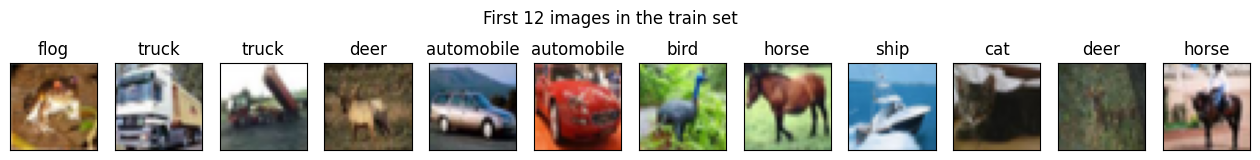

In [4]:
# 앞 12개 영상을 그려줌
plt.figure(figsize=(16,2))
plt.suptitle("First 12 images in the train set")
for i in range(12): #고양이이면 0001000000 이런식으로 들어가는데 가장 큰 숫자(1)에 해당하는 피처 그려줌
    plt.subplot(1,12,i+1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(class_names[np.argmax(y_train[i])])

구조와 동작과 학습을 확인해야


In [5]:
# 신경망 모델 설계
#구조
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))) # 32개 커널(필터),3*3짜리 / 32*32 사이즈에 컬러니까 RGB 3장
cnn.add(Conv2D(32,(3,3),activation='relu')) # 32개 커널(필터),3*3짜리
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu')) #심층신경망과 차이: 뒤로 갈수록 필터가 늘어남
cnn.add(Conv2D(64,(3,3),activation='relu')) #컨볼루션 레이어 4개층
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten()) #일열로 펼치기
cnn.add(Dense(512,activation='relu')) #한번 학습 더 시키기
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax')) #출력

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy']) #다중이라 categorical_crossentropy 사용
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
391/391 - 20s - 52ms/step - accuracy: 0.3934 - loss: 1.6521 - val_accuracy: 0.5238 - val_loss: 1.3154
Epoch 2/30
391/391 - 6s - 15ms/step - accuracy: 0.5512 - loss: 1.2558 - val_accuracy: 0.6089 - val_loss: 1.0954
Epoch 3/30
391/391 - 5s - 13ms/step - accuracy: 0.6137 - loss: 1.0846 - val_accuracy: 0.6636 - val_loss: 0.9481
Epoch 4/30
391/391 - 5s - 13ms/step - accuracy: 0.6604 - loss: 0.9589 - val_accuracy: 0.7000 - val_loss: 0.8545
Epoch 5/30
391/391 - 5s - 13ms/step - accuracy: 0.6878 - loss: 0.8820 - val_accuracy: 0.7161 - val_loss: 0.8204
Epoch 6/30
391/391 - 3s - 9ms/step - accuracy: 0.7117 - loss: 0.8166 - val_accuracy: 0.7336 - val_loss: 0.7637
Epoch 7/30
391/391 - 3s - 9ms/step - accuracy: 0.7279 - loss: 0.7751 - val_accuracy: 0.7364 - val_loss: 0.7547
Epoch 8/30
391/391 - 4s - 9ms/step - accuracy: 0.7427 - loss: 0.7305 - val_accuracy: 0.7524 - val_loss: 0.7122
Epoch 9/30
391/391 - 5s - 13ms/step - accuracy: 0.7584 - loss: 0.6871 - val_accuracy: 0.7614 - val_loss: 0

In [7]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,671,232 (10.19 MB)

 Trainable params: 890,410 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,780,822 (6.79 MB)

#####32*32 -> 30*30이 32개 생김: padding을 안써서
##### 30*30 -> 28*28이 됨
#####max pooling으로 반으로 줄음 -> 14*14
#####14*14 -> 12*12
#####12*12 ->10*10
#####dropout은 구조와 상관없음
#####Flatten으로 펼치기 5*5*64=1600
#####Dense -> 10개로 분류

In [8]:
# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

정확률은 79.97000217437744


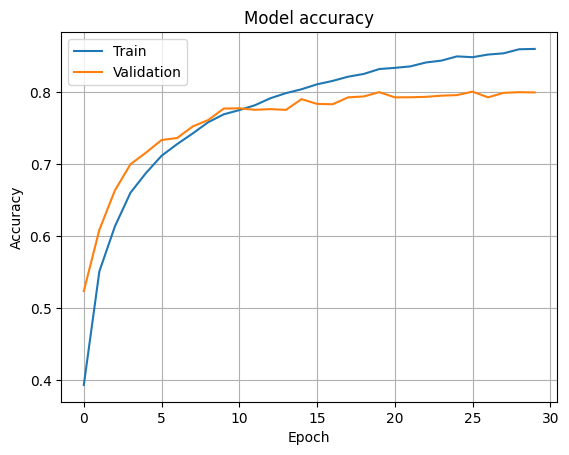

In [9]:
import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()
#학습을 더 시켜볼필요가 있지만...수업시간 이슈
#overfitting되면 training data는 학습시킬수록 좋아짐 validation은 올라가다 뚝 떨어짐

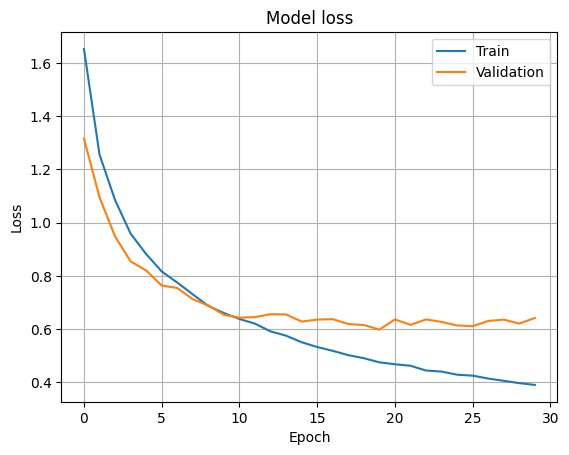

In [10]:
# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()
cnn.save("my_cnn.h5")
#validation이 치솟으면 over fitting

In [11]:
#테스트 이미지 임의로 한개 선택
import random

# 테스트 데이터셋에서 무작위로 이미지 하나 선택
index = random.randint(0, x_test.shape[0] - 1)
test_image = x_test[index]
test_label = y_test[index]

In [12]:
# 선택된 이미지의 실제 클래스 이름 확인
actual_class_index = np.argmax(test_label)
actual_class_name = class_names[actual_class_index]

print(actual_class_index, actual_class_name)

7 horse


In [13]:
# 모델 사용하여 이미지 분류
predictions = cnn.predict(np.expand_dims(test_image, axis=0))
predicted_class_index = np.argmax(predictions)
predicted_class_name = class_names[predicted_class_index]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


In [14]:
print(predicted_class_index, predicted_class_name)

7 horse


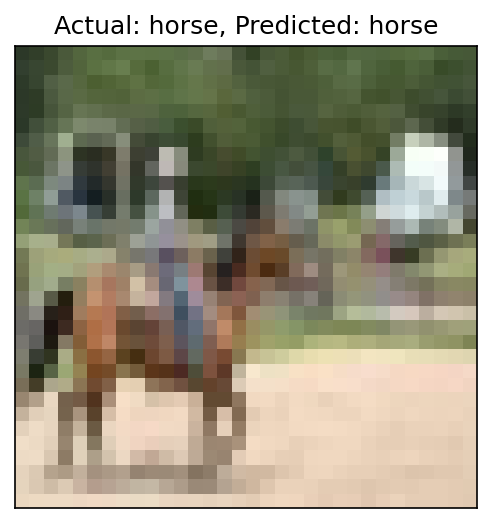

In [15]:
# 이미지와 분류 결과 출력
plt.figure(figsize=(4,4), dpi=150)
plt.imshow(test_image)
plt.xticks([]); plt.yticks([])
plt.title(f"Actual: {actual_class_name}, Predicted: {predicted_class_name}")
plt.show()

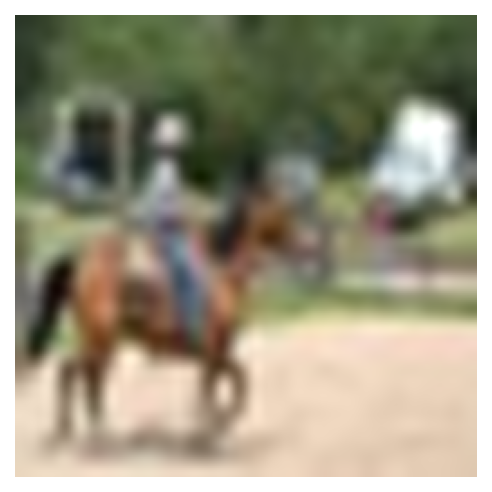

In [16]:
import cv2
import matplotlib.pyplot as plt

# CIFAR-10 이미지를 8배 업스케일 (32x32 → 256x256)
upscaled = cv2.resize(test_image, (256, 256), interpolation=cv2.INTER_CUBIC)

plt.figure(figsize=(4,4), dpi=150)
plt.imshow(upscaled)
plt.axis("off")
plt.show()

In [17]:
from tensorflow.keras.models import load_model

# 저장된 모델 로드
model = load_model("my_cnn.h5")

# 잘 불러왔는지 확인
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 890,412 (3.40 MB)

 Trainable params: 890,410 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

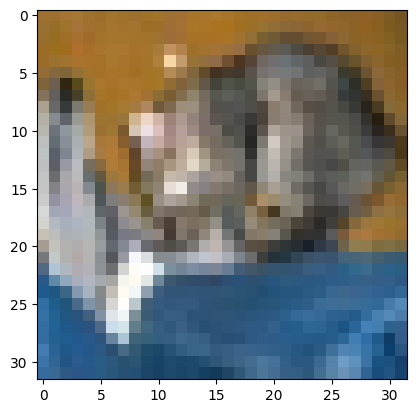

In [18]:
plt.figure()
plt.imshow(x_test[0])

In [19]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [20]:
print("정답=", y_test[0])
print(class_names[np.argmax(y_test[0])])
print("예측=", y_pred[0])
print(class_names[np.argmax(y_pred[0])])

정답= [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
cat
예측= [1.3987516e-03 1.7315099e-06 3.2344977e-03 7.7722180e-01 1.7773102e-05
 1.4169383e-01 7.6166742e-02 5.7735933e-06 1.4987943e-04 1.0917217e-04]
cat
